In [ ]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import pandas as pd

#import dataset langsung dari kaggle
od.download(
    "https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes?resource=download")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: fadhilwicaksono
Your Kaggle Key: ··········


100%|██████████| 1.10M/1.10M [00:00<00:00, 61.7MB/s]

In [ ]:
#Data Preparasi
#dataset mobil Hyundai
dataset = pd.read_csv("./used-car-dataset-ford-and-mercedes/hyundi.csv")
dataset.head()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [ ]:
#cek shape dataset
dataset.shape

(4860, 9)

In [ ]:
dataset.describe

<bound method NDFrame.describe of         model  year  price transmission  mileage fuelType  tax(£)   mpg  \
0         I20  2017   7999       Manual    17307   Petrol     145  58.9   
1      Tucson  2016  14499    Automatic    25233   Diesel     235  43.5   
2      Tucson  2016  11399       Manual    37877   Diesel      30  61.7   
3         I10  2016   6499       Manual    23789   Petrol      20  60.1   
4        IX35  2015  10199       Manual    33177   Diesel     160  51.4   
...       ...   ...    ...          ...      ...      ...     ...   ...   
4855      I30  2016   8680       Manual    25906   Diesel       0  78.4   
4856      I40  2015   7830       Manual    59508   Diesel      30  65.7   
4857      I10  2017   6830       Manual    13810   Petrol      20  60.1   
4858   Tucson  2018  13994       Manual    23313   Petrol     145  44.8   
4859   Tucson  2016  15999    Automatic    11472   Diesel     125  57.6   

      engineSize  
0            1.2  
1            2.0  
2       

In [ ]:

data_training = dataset.dropna(axis=0) #axjs = 0 --> rows, axis = 1 --> column
data_training.describe()

,year,price,mileage,tax(£),mpg,engineSize
count,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000,4860.000000
mean,2017.107613,12750.13107,21486.049588,121.147119,53.827798,1.457922
std,1.920456,5992.92231,17710.196964,58.003289,12.736042,0.400788
min,2000.000000,1200.00000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,8000.00000,8339.250000,125.000000,44.800000,1.200000
50%,2017.000000,11990.00000,17462.000000,145.000000,55.400000,1.600000
75%,2019.000000,15733.75000,30967.000000,145.000000,60.100000,1.700000
max,2020.000000,92000.00000,138000.000000,555.000000,256.800000,2.900000


In [ ]:
print (data_training.dtypes)

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax(£)            int64
mpg             float64
engineSize      float64
dtype: object


In [ ]:
features = ['year', 'mileage', 'tax(£)', 'mpg', 'engineSize']
x = data_training[features]
y = data_training['price']
x.shape, y.shape

((4860, 5), (4860,))

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 70) #random state

In [ ]:
test_y.shape

(1215,)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor as KNN_Reg
from sklearn.metrics import mean_squared_error as mse

model = KNN_Reg(n_neighbors = 80)

# training the model:
model.fit(train_x, train_y)
acc1 = model.score(test_x, test_y)

# test for prediction
test_predict = model.predict(test_x)
score = mse(test_predict, test_y)
print(' MSE: ', score, '\n', 'Accuracy: ', acc1)  

 MSE:  25581499.938654833 
 Accuracy:  0.2329362433121357


In [ ]:
def Elbow(K):
  #initiating an empy list
  test_mse =[]

  #train model for every value of K
  for i in K:
    model = KNN_Reg(n_neighbors=i)
    model.fit(train_x, train_y)
    tmp = model.predict(test_x)
    tmp = mse(tmp, test_y)
    test_mse.append(tmp)
  
  return test_mse

Text(0.5, 1.0, 'Elbow Curve for Test')

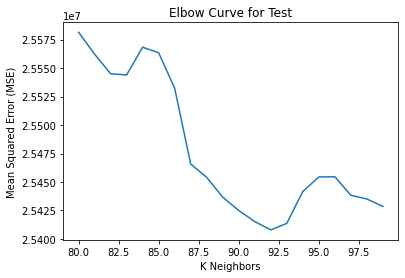

In [ ]:
import matplotlib.pyplot as plt
K = range(80, 100)
test = Elbow(K)

#plotting
plt.plot(K,test)
plt.xlabel('K Neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Curve for Test')

In [ ]:
#diambil angka 92 karena Elbow mennunjukan mse paling kecil
new_model = KNN_Reg(n_neighbors=92)

# Train model
new_model.fit(train_x, train_y)
acc2 = new_model.score(test_x, test_y)

# Prediction test
print(' Accuracy of new model (%):', acc2*100, '\n', 'Accuracy of old model (%):', acc1*100, '\n Improvement (%):', (acc2-acc1)*100)

 Accuracy of new model (%): 23.814068247074836 
 Accuracy of old model (%): 23.293624331213568 
 Improvement (%): 0.5204439158612684




Memprediksi dengan memasukkan data yang dimiliki berupa:

    Tahun dibuatnya mobil --- year
    Jarak tempuh mobil dalam satuan mil --- mileage
    Pajak kendaraan yang berlaku --- tax
    Kebutuhan rata-rata bahan bakar dalam satuan mpg --- mpg
    Besarnya ukuran mesin --- engineSize

Konversi mata uang : £ 1 = Rp 18679, data diambil pada 23 November 2022

Percobaan ke 1

Data mobil bekas: year=2020, mileage=6000, tax=150, mpg=30.2, engineSize=2

Format input data:

data_mobil_bekas = ['year', 'mileage', 'tax', 'mpg', 'engineSize']


Data mobil bekas: year=2021, mileage=19000, tax=200, mpg=20, engineSize=3]

Format input data:

data_mobil_bekas = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

In [ ]:
import numpy as np
data_mobil_bekas = np.array([[2020,6000,150,30.2,2]])
prediction_old = model.predict(data_mobil_bekas)
prediction_new = new_model.predict(data_mobil_bekas)
print(' Hasil Prediksi harga mobil dengan old model: £', prediction_old, 'atau jika dirupiahkan yaitu: Rp', prediction_old * 18679*1e-6, 'Juta\n',
      'Hasil Prediksi harga mobil dengan new model: £', prediction_new, 'atau jika dirupiahkan yaitu: Rp', prediction_new * 18679*1e-6, 'Juta')

 Hasil Prediksi harga mobil dengan old model: £ [16198.0125] atau jika dirupiahkan yaitu: Rp [302.56267549] Juta
 Hasil Prediksi harga mobil dengan new model: £ [16633.81521739] atau jika dirupiahkan yaitu: Rp [310.70303445] Juta


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [ ]:
data_mobil_bekas = np.array([[2021,19000,200,20,3]])
prediction_old = model.predict(data_mobil_bekas)
prediction_new = new_model.predict(data_mobil_bekas)
print(' Hasil Prediksi harga mobil dengan old model: £', prediction_old, 'atau jika dirupiahkan yaitu: Rp', prediction_old * 18679*1e-6, 'Juta\n',
      'Hasil Prediksi harga mobil dengan new model: £', prediction_new, 'atau jika dirupiahkan yaitu: Rp', prediction_new * 18679*1e-6, 'Juta')

 Hasil Prediksi harga mobil dengan old model: £ [11903.2] atau jika dirupiahkan yaitu: Rp [222.3398728] Juta
 Hasil Prediksi harga mobil dengan new model: £ [11761.09782609] atau jika dirupiahkan yaitu: Rp [219.68554629] Juta


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(




Percobaan ke 3

Data mobil bekas: year=2010, mileage=90000, tax=150, mpg=20, engineSize=2]

Format input data:

data_mobil_bekas = ['year', 'mileage', 'tax', 'mpg', 'engineSize']


In [ ]:
data_mobil_bekas = np.array([[2010,90000,150,20,2]])
prediction_old = model.predict(data_mobil_bekas)
prediction_new = new_model.predict(data_mobil_bekas)
print(' Hasil Prediksi harga mobil dengan old model: £', prediction_old, 'atau jika dirupiahkan yaitu: Rp', prediction_old * 18679*1e-6, 'Juta\n',
      'Hasil Prediksi harga mobil dengan new model: £', prediction_new, 'atau jika dirupiahkan yaitu: Rp', prediction_new * 18679*1e-6, 'Juta')

 Hasil Prediksi harga mobil dengan old model: £ [6148.025] atau jika dirupiahkan yaitu: Rp [114.83895897] Juta
 Hasil Prediksi harga mobil dengan new model: £ [6186.59782609] atau jika dirupiahkan yaitu: Rp [115.55946079] Juta


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
